#### EDA 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/raw/sales-data.csv')

In [4]:
df.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
unique = df['item'].unique()

In [6]:
print(unique.size)
print(unique)

50
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [7]:
df['item'].value_counts()

item
1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: count, dtype: int64

In [8]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [9]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [10]:
df.sample()

,date,store,item,sales
512576,2016-07-20,1,29,86


In [11]:
# df = df.sort_values(by=['store','item','date'])

In [12]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [15]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [16]:
df = df.sort_values(by=['date','store','item'])

In [17]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
18260,2013-01-01,1,2,33
36520,2013-01-01,1,3,15
54780,2013-01-01,1,4,10
73040,2013-01-01,1,5,11


In [18]:
df['date'].dtype

dtype('O')

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df['date'].dtype

dtype('<M8[ns]')

In [21]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
18260,2013-01-01,1,2,33
36520,2013-01-01,1,3,15
54780,2013-01-01,1,4,10
73040,2013-01-01,1,5,11


In [22]:
df['day'] = df['date'].dt.day

In [23]:
df['momth'] = df['date'].dt.month

In [24]:
df['dayofweek'] = df['date'].dt.dayofweek

In [25]:
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

In [26]:
df.head()

,date,store,item,sales,day,momth,dayofweek,is_weekend
0,2013-01-01,1,1,13,1,1,1,0
18260,2013-01-01,1,2,33,1,1,1,0
36520,2013-01-01,1,3,15,1,1,1,0
54780,2013-01-01,1,4,10,1,1,1,0
73040,2013-01-01,1,5,11,1,1,1,0


In [27]:
df = df.rename(columns={'momth' : 'month'})

In [28]:
df.sample(5)

,date,store,item,sales,day,month,dayofweek,is_weekend
331701,2016-04-10,2,19,62,10,4,6,1
44399,2014-07-30,5,3,35,30,7,2,0
167455,2016-07-13,2,10,119,13,7,2,0
204364,2017-08-06,2,12,122,6,8,6,1
599417,2014-05-05,9,33,82,5,5,0,0


In [29]:
df.isnull().sum()

date          0
store         0
item          0
sales         0
day           0
month         0
dayofweek     0
is_weekend    0
dtype: int64

In [30]:
df.to_csv("../data/processed/clean-data.csv",index = False)

### Visualisation

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

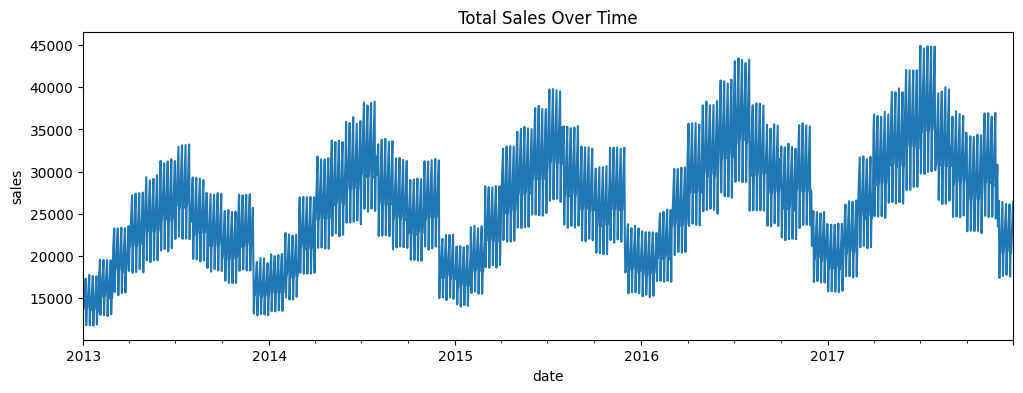

In [32]:
ax = df.groupby('date')['sales'].sum().plot(figsize=(12,4), title = "Total Sales Over Time", ylabel = "sales")

In [33]:
fig = ax.get_figure()
fig.savefig("../reports/sales_over_time.png")

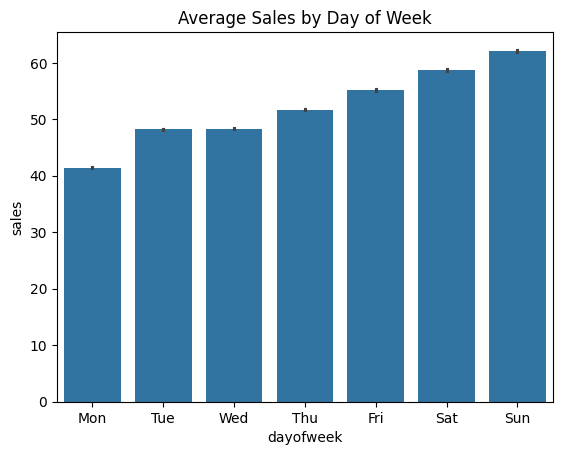

In [34]:
labels = ["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"]
ax = sns.barplot(x = 'dayofweek', y = 'sales', data=df)
ax.set_xticklabels(labels)
plt.title("Average Sales by Day of Week")
plt.savefig("../reports/average_sales_dayofweek.png")

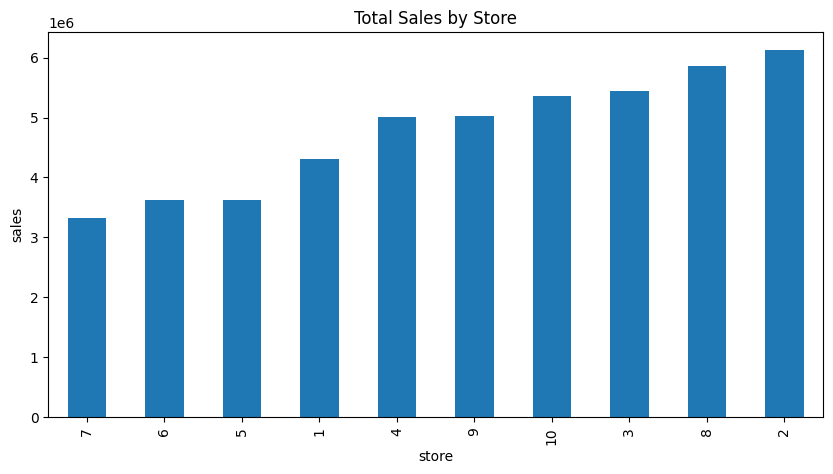

In [35]:
ax = df.groupby('store')['sales'].sum().sort_values().plot(kind = 'bar', figsize=(10,5), title = "Total Sales by Store", ylabel = "sales")
fig = ax.get_figure()
fig.savefig("../reports/total_sales_by_store.png")

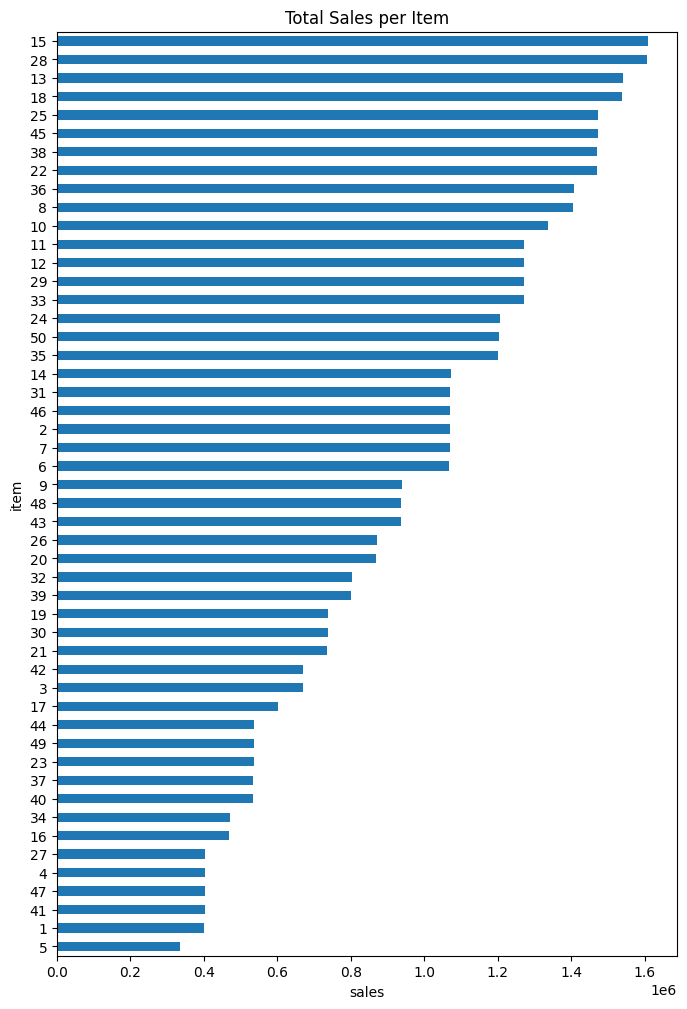

In [36]:
sx = df.groupby('item')['sales'].sum().sort_values().plot(kind = 'barh', figsize=(8,12),title = "Total Sales per Item" ,xlabel = "sales")
fig = sx.get_figure()
fig.savefig("../reports/total_sales_per_item.png")

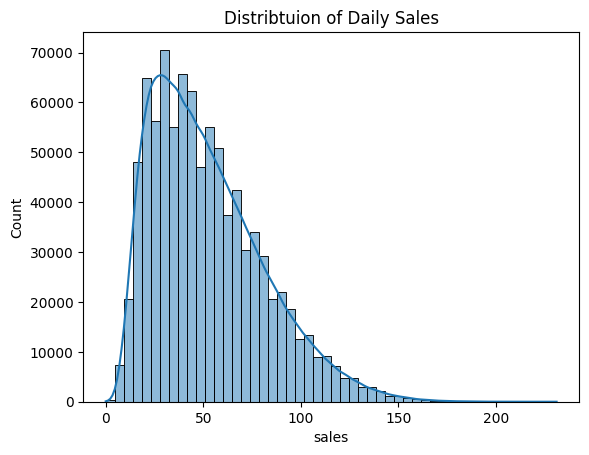

In [37]:
sns.histplot(df['sales'],bins=50,kde=True)
plt.title("Distribtuion of Daily Sales")
plt.savefig("../reports/distribution.png")

In [38]:
df['sales_log'] = np.log1p(df['sales'])
df.sample(5)

,date,store,item,sales,day,month,dayofweek,is_weekend,sales_log
85702,2017-09-03,7,5,14,3,9,6,1,2.708050
407113,2017-10-08,3,23,45,8,10,6,1,3.828641
228777,2014-06-12,6,13,82,12,6,3,0,4.418841
35975,2016-07-05,10,2,80,5,7,1,0,4.394449
158537,2017-02-10,7,9,29,10,2,4,0,3.401197


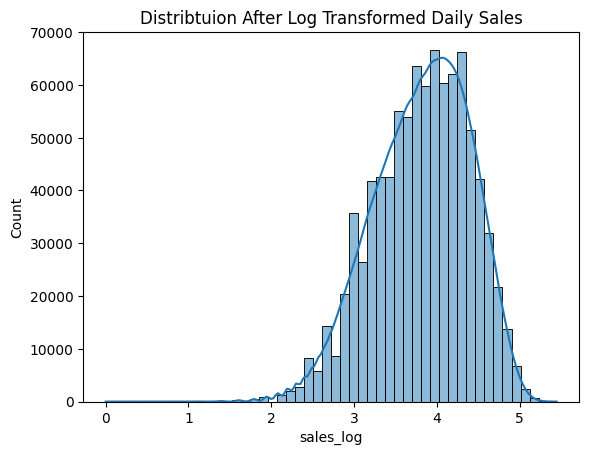

In [39]:
sns.histplot(df['sales_log'],bins=50,kde=True)
plt.title("Distribtuion After Log Transformed Daily Sales")
plt.savefig("../reports/distribution_after_log_transform.png")

In [40]:
df.to_csv("../data/processed/after_log_data.csv", index = False)